In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

In [2]:
# Fetching dataset
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)

In [3]:
len(X_train)

8982

In [4]:
len(X_test)

2246

In [5]:
# Decoding first newswire
word_index = reuters.get_word_index()
word_dict = dict([(value, key) for key, value in word_index.items()])
first_newswire = ' '.join([word_dict.get(i - 3, '?') for i in X_train[0]])
print(first_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
# One hot encoding of train and test data

def encode(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = encode(X_train)
X_test = encode(X_test)

In [7]:
# Using keras built in tools to one hot encode to labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Building Neural Network

In [9]:
# Making a neural network
from tensorflow.keras import models, layers

network = models.Sequential()
network.add(layers.Dense(64, activation = "relu", input_shape = (10000,)))
network.add(layers.Dense(64, activation = "relu"))
network.add(layers.Dense(46, activation = "softmax"))

We can see that, here we use *softmax* activation function. This activation is frequently used to output *probability distribution* of all categories.

In [10]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
# Create validation sets
val_X_train = X_train[:1000]
X = X_train[1000:]

val_y_train = y_train[:1000]
y = y_train[1000:]

In [12]:
history = network.fit(X, y, epochs = 20, batch_size = 512, validation_data = (val_X_train, val_y_train))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 337us/sample - loss: 2.7046 - accuracy: 0.4944 - val_loss: 1.7809 - val_accuracy: 0.6490
Epoch 2/20
7982/7982 [==============================] - 1s 132us/sample - loss: 1.4546 - accuracy: 0.7112 - val_loss: 1.3256 - val_accuracy: 0.7180
Epoch 3/20
7982/7982 [==============================] - 1s 127us/sample - loss: 1.0699 - accuracy: 0.7838 - val_loss: 1.1777 - val_accuracy: 0.7500
Epoch 4/20
7982/7982 [==============================] - 1s 127us/sample - loss: 0.8568 - accuracy: 0.8218 - val_loss: 1.0542 - val_accuracy: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 134us/sample - loss: 0.6881 - accuracy: 0.8564 - val_loss: 0.9970 - val_accuracy: 0.7910
Epoch 6/20
7982/7982 [==============================] - 1s 144us/sample - loss: 0.5594 - accuracy: 0.8850 - val_loss: 0.9509 - val_accuracy: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 136us

In [13]:
def show_loss(h_dict):
    loss = h_dict["loss"]
    val_loss = h_dict["val_loss"]
    epochs = range(1, len(loss)+1)
#     plt.ylim(0, 1)
#     plt.xlim(0, len(loss)+1)
#     plt.axis("scaled")
    plt.plot(epochs, loss, "bo", label = "Training Loss")
    plt.plot(epochs, val_loss, "b", label = "Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def show_accuracy(h_dict):
    acc = h_dict["accuracy"]
    val_acc = h_dict["val_accuracy"]
    epochs = range(1, len(acc)+1)
#     plt.ylim(0, 1)
#     plt.xlim(0, len(acc)+1)
#     plt.axis("scaled")
    plt.plot(epochs, acc, "bo", label = "Training Accuracy")
    plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

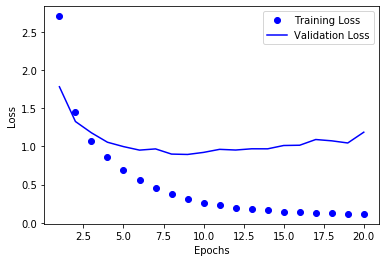

In [14]:
show_loss(history.history)

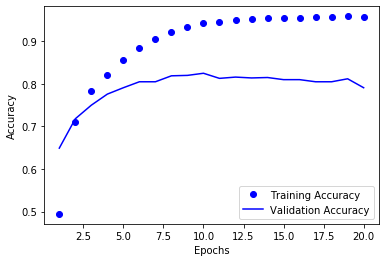

In [15]:
show_accuracy(history.history)

## Fitting original data into Network

In [16]:
network = models.Sequential()
network.add(layers.Dense(64, activation = "relu", input_shape = (10000,)))
network.add(layers.Dense(64, activation = "relu"))
network.add(layers.Dense(46, activation = "softmax"))
network.compile(optimizer = "rmsprop", loss="categorical_crossentropy", metrics = ["accuracy"])

In [17]:
history = network.fit(X_train, y_train, epochs = 10, batch_size = 512, validation_data = (X_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 2s 253us/sample - loss: 2.5684 - accuracy: 0.5220 - val_loss: 1.6983 - val_accuracy: 0.6434
Epoch 2/10
8982/8982 [==============================] - 1s 142us/sample - loss: 1.3712 - accuracy: 0.7017 - val_loss: 1.3251 - val_accuracy: 0.7070
Epoch 3/10
8982/8982 [==============================] - 1s 143us/sample - loss: 1.0151 - accuracy: 0.7818 - val_loss: 1.1481 - val_accuracy: 0.7458
Epoch 4/10
8982/8982 [==============================] - 1s 143us/sample - loss: 0.7894 - accuracy: 0.8318 - val_loss: 1.0473 - val_accuracy: 0.7694
Epoch 5/10
8982/8982 [==============================] - 1s 141us/sample - loss: 0.6181 - accuracy: 0.8725 - val_loss: 0.9901 - val_accuracy: 0.7850
Epoch 6/10
8982/8982 [==============================] - 1s 141us/sample - loss: 0.4880 - accuracy: 0.8975 - val_loss: 0.9428 - val_accuracy: 0.7903
Epoch 7/10
8982/8982 [==============================] - 1s 140us

## Predicting labels for testing data

In [18]:
y_pred = network.predict(X_test)

The Prediction gaves probability distribution over the 46 labels.

In [19]:
y_pred[0].shape

(46,)

In [20]:
np.sum(y_pred[0])

0.9999999

In [22]:
np.argmax(y_pred[0]), y_test[0]

(3, array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

## Different way to handle the labels and loss

If we do not  *one hot encode* our test labels, *categorical_crossentropy* would be not useful for this type of data.
*categorical_crossentropy* expects labels to be in categorical encoding (column wise). For non-encoded labels, *sparse_categorical_crossentorpy* loss function is used.

## Intermediate layers with less than 46 units

A network must be capable to fit entire data. Omitting data could result in unexpected results. A network must be trained on the entire data. This means having less units to process than the data, could result in discarding useful information, which affects the final results. The intermediate layers almost always be capable to fit all input units.

### Let's what happen when we discard information

In [23]:
network = models.Sequential()
network.add(layers.Dense(64, activation = "relu", input_shape = (10000,)))
network.add(layers.Dense(4, activation = "relu"))
network.add(layers.Dense(46, activation = "softmax"))
network.compile(optimize = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [24]:
history = network.fit(X, y, epochs = 20, batch_size = 512, validation_data = (val_X_train, val_y_train))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 288us/sample - loss: 3.7132 - accuracy: 0.0727 - val_loss: 3.5442 - val_accuracy: 0.0480
Epoch 2/20
7982/7982 [==============================] - 1s 133us/sample - loss: 3.4000 - accuracy: 0.0703 - val_loss: 3.2960 - val_accuracy: 0.0860
Epoch 3/20
7982/7982 [==============================] - 1s 134us/sample - loss: 3.1223 - accuracy: 0.0898 - val_loss: 3.0724 - val_accuracy: 0.0790
Epoch 4/20
7982/7982 [==============================] - 1s 136us/sample - loss: 2.8481 - accuracy: 0.3167 - val_loss: 2.8199 - val_accuracy: 0.4100
Epoch 5/20
7982/7982 [==============================] - 1s 137us/sample - loss: 2.5659 - accuracy: 0.4301 - val_loss: 2.5777 - val_accuracy: 0.4200
Epoch 6/20
7982/7982 [==============================] - 1s 135us/sample - loss: 2.3001 - accuracy: 0.4442 - val_loss: 2.3630 - val_accuracy: 0.4240
Epoch 7/20
7982/7982 [==============================] - 1s 136us

Here we can see that, validation accuracy is only **68.3%**, a huge drop of **11%** in the validation accuracy. This clearly shows that, less units for processing than input units puts adverse effect on the optimal accuracy

## Network having 128 processing units

In [25]:
network = models.Sequential()
network.add(layers.Dense(128, activation = "relu", input_shape = (10000,)))
network.add(layers.Dense(128, activation = "relu"))
network.add(layers.Dense(46, activation = "softmax"))
network.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [26]:
history = network.fit(X, y, epochs = 20, batch_size = 512, validation_data = (val_X_train, val_y_train))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 304us/sample - loss: 2.0646 - accuracy: 0.5753 - val_loss: 1.3616 - val_accuracy: 0.7000
Epoch 2/20
7982/7982 [==============================] - 1s 173us/sample - loss: 1.0911 - accuracy: 0.7636 - val_loss: 1.0931 - val_accuracy: 0.7590
Epoch 3/20
7982/7982 [==============================] - 1s 168us/sample - loss: 0.7750 - accuracy: 0.8326 - val_loss: 0.9586 - val_accuracy: 0.8110
Epoch 4/20
7982/7982 [==============================] - 1s 174us/sample - loss: 0.5607 - accuracy: 0.8825 - val_loss: 0.9015 - val_accuracy: 0.8150
Epoch 5/20
7982/7982 [==============================] - 1s 172us/sample - loss: 0.4062 - accuracy: 0.9113 - val_loss: 0.8874 - val_accuracy: 0.8200
Epoch 6/20
7982/7982 [==============================] - 1s 171us/sample - loss: 0.3148 - accuracy: 0.9306 - val_loss: 0.8601 - val_accuracy: 0.8310
Epoch 7/20
7982/7982 [==============================] - 1s 174us

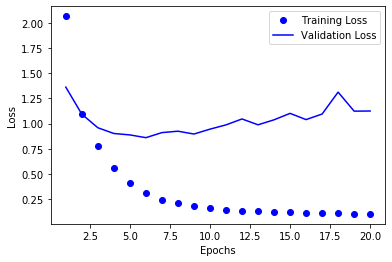

In [28]:
show_loss(history.history)

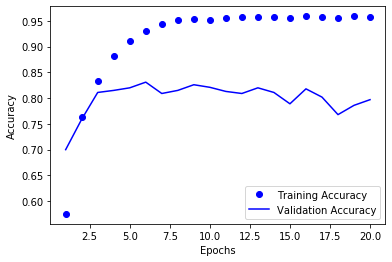

In [29]:
show_accuracy(history.history)

### No signs of any awesome results. Validation accuracy is still **79%**

## Network having 128 units of 3 intermediate layers

In [30]:
network = models.Sequential()
network.add(layers.Dense(128, activation = "relu", input_shape = (10000,)))
network.add(layers.Dense(128, activation = "relu"))
network.add(layers.Dense(128, activation = "relu"))
network.add(layers.Dense(46, activation = "softmax"))
network.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [31]:
history = network.fit(X, y, epochs = 20, batch_size = 512, validation_data = (val_X_train, val_y_train))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 334us/sample - loss: 2.1866 - accuracy: 0.5272 - val_loss: 1.3761 - val_accuracy: 0.6890
Epoch 2/20
7982/7982 [==============================] - 1s 174us/sample - loss: 1.1860 - accuracy: 0.7260 - val_loss: 1.1805 - val_accuracy: 0.7350
Epoch 3/20
7982/7982 [==============================] - 1s 176us/sample - loss: 0.8507 - accuracy: 0.8069 - val_loss: 1.1187 - val_accuracy: 0.7780
Epoch 4/20
7982/7982 [==============================] - 1s 178us/sample - loss: 0.6164 - accuracy: 0.8637 - val_loss: 1.0527 - val_accuracy: 0.7670
Epoch 5/20
7982/7982 [==============================] - 1s 172us/sample - loss: 0.4540 - accuracy: 0.8999 - val_loss: 0.9770 - val_accuracy: 0.7980
Epoch 6/20
7982/7982 [==============================] - 1s 175us/sample - loss: 0.3551 - accuracy: 0.9204 - val_loss: 0.9230 - val_accuracy: 0.8160
Epoch 7/20
7982/7982 [==============================] - 1s 172us

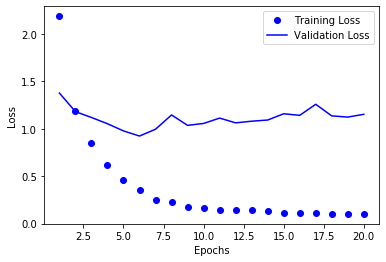

In [32]:
show_loss(history.history)

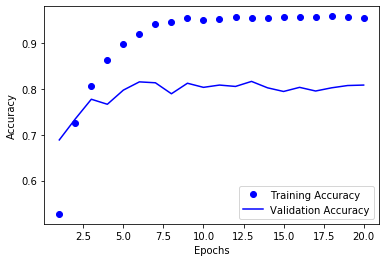

In [33]:
show_accuracy(history.history)

### Still same results

## Network having 64 processin units of 3 hidden layers

In [34]:
network = models.Sequential()
network.add(layers.Dense(64, activation = "relu", input_shape = (10000,)))
network.add(layers.Dense(64, activation = "relu"))
network.add(layers.Dense(64, activation = "relu"))
network.add(layers.Dense(46, activation = "softmax"))
network.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [35]:
history = network.fit(X, y, epochs = 20, batch_size = 512, validation_data = (val_X_train, val_y_train))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 290us/sample - loss: 2.7564 - accuracy: 0.4875 - val_loss: 1.7638 - val_accuracy: 0.6000
Epoch 2/20
7982/7982 [==============================] - 1s 140us/sample - loss: 1.4873 - accuracy: 0.6805 - val_loss: 1.3475 - val_accuracy: 0.6890
Epoch 3/20
7982/7982 [==============================] - 1s 139us/sample - loss: 1.1049 - accuracy: 0.7542 - val_loss: 1.1673 - val_accuracy: 0.7350
Epoch 4/20
7982/7982 [==============================] - 1s 137us/sample - loss: 0.8540 - accuracy: 0.8147 - val_loss: 1.0483 - val_accuracy: 0.7730
Epoch 5/20
7982/7982 [==============================] - 1s 140us/sample - loss: 0.6685 - accuracy: 0.8524 - val_loss: 0.9891 - val_accuracy: 0.7880
Epoch 6/20
7982/7982 [==============================] - 1s 142us/sample - loss: 0.5483 - accuracy: 0.8761 - val_loss: 0.9810 - val_accuracy: 0.8000
Epoch 7/20
7982/7982 [==============================] - 1s 137us

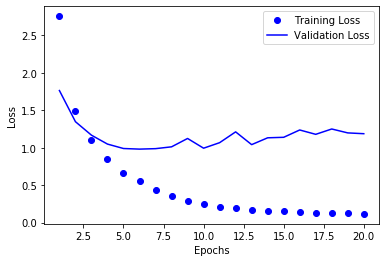

In [36]:
show_loss(history.history)

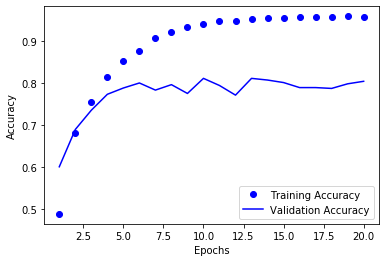

In [37]:
show_accuracy(history.history)